In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from mplsoccer import Pitch, VerticalPitch, FontManager
from adjustText import adjust_text
from highlight_text import fig_text
from highlight_text import htext
import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/match/16623'
url = base_url

In [8]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22457205\x22,\x22minute\x22\x3A\x229\x22,\x22result\x22\x3A\x22BlockedShot\x22,\x22X\x22\x3A\x220.8419999694824218\x22,\x22Y\x22\x3A\x220.35200000762939454\x22,\x22xG\x22\x3A\x220.05325675755739212\x22,\x22player\x22\x3A\x22Max\x20Aarons\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x227688\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222021\x22,\x22shotType\x22\x3A\x22LeftFoot\x22,\x22match_id\x22\x3A\x2216623\x22,\x22h_team\x22\x3A\x22Norwich\x22,\x22a_team\x22\x3A\x22Manchester\x20City\x22,\x22h_goals\x22\x3A\x220\x22,\x22a_goals\x22\x3A\x224\x22,\x22date\x22\x3A\x222022\x2D02\x2D12\x2017\x3A30\x3A00\x22,\x22player_assisted\x22\x3A\x22Pierre\x20Lees\x2DMelou\x22,\x22lastAction\x22\x3A\x22TakeOn\x22\x7D,\x7B\x22id\x22\x3A\x22457206\x22,\x22m

In [4]:
#get only the shotsData
strings = scripts[1].string

In [9]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)
data

{'h': [{'id': '457205',
   'minute': '9',
   'result': 'BlockedShot',
   'X': '0.8419999694824218',
   'Y': '0.35200000762939454',
   'xG': '0.05325675755739212',
   'player': 'Max Aarons',
   'h_a': 'h',
   'player_id': '7688',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'LeftFoot',
   'match_id': '16623',
   'h_team': 'Norwich',
   'a_team': 'Manchester City',
   'h_goals': '0',
   'a_goals': '4',
   'date': '2022-02-12 17:30:00',
   'player_assisted': 'Pierre Lees-Melou',
   'lastAction': 'TakeOn'},
  {'id': '457206',
   'minute': '9',
   'result': 'SavedShot',
   'X': '0.8980000305175782',
   'Y': '0.34799999237060547',
   'xG': '0.08071722090244293',
   'player': 'Teemu Pukki',
   'h_a': 'h',
   'player_id': '7696',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'RightFoot',
   'match_id': '16623',
   'h_team': 'Norwich',
   'a_team': 'Manchester City',
   'h_goals': '0',
   'a_goals': '4',
   'date': '2022-02-12 17:30:00',
   'player_assisted'

In [64]:
minute = []
x = []
y = []
situation = []
xG = []
team = []
outcome = []
h_data = data['h']
a_data = data['a']

for index in range(len(h_data)):
    for key in h_data[index]:
        if key == 'X':
            x.append(h_data[index][key])
        if key == 'Y':
            y.append(h_data[index][key])
        if key == 'situation':
            situation.append(h_data[index][key])
        if key == 'xG':
            xG.append(h_data[index][key])
        if key == 'minute':
            minute.append(h_data[index][key])
        if key == 'result':
            outcome.append(h_data[index][key])
        if key == 'h_team':
            team.append(h_data[index][key])

for index in range(len(a_data)):
    for key in a_data[index]:
        if key == 'X':
            x.append(a_data[index][key])
        if key == 'Y':
            y.append(a_data[index][key])
        if key == 'situation':
            situation.append(a_data[index][key])
        if key == 'xG':
            xG.append(a_data[index][key])
        if key == 'minute':
            minute.append(a_data[index][key])
        if key == 'result':
            outcome.append(a_data[index][key])
        if key == 'a_team':
            team.append(a_data[index][key])

In [65]:
col_names = ['X', 'Y', 'Situation', 'xG','Minute','Outcome', 'Team']
df = pd.DataFrame([x,y,situation,xG,minute,outcome, team],index=col_names)
df = df.T
df

,X,Y,Situation,xG,Minute,Outcome,Team
0,0.8419999694824218,0.35200000762939454,OpenPlay,0.05325675755739212,9,BlockedShot,Norwich
1,0.8980000305175782,0.34799999237060547,OpenPlay,0.08071722090244293,9,SavedShot,Norwich
2,0.91,0.495,FromCorner,0.03300519287586212,17,MissedShots,Norwich
3,0.8919999694824219,0.47200000762939454,FromCorner,0.017727935686707497,17,ShotOnPost,Norwich
4,0.8090000152587891,0.4809999847412109,OpenPlay,0.05006793886423111,32,MissedShots,Norwich
5,0.8419999694824218,0.6780000305175782,OpenPlay,0.04097261652350426,60,SavedShot,Norwich
6,0.879000015258789,0.5870000076293945,FromCorner,0.017692983150482178,64,MissedShots,Norwich
7,0.905,0.4209999847412109,SetPiece,0.06331406533718109,77,SavedShot,Norwich
8,0.955,0.315,OpenPlay,0.06308393180370331,4,ShotOnPost,Manchester City
9,0.914000015258789,0.545,OpenPlay,0.10395170748233795,7,SavedShot,Manchester City


In [100]:
df['X'] = pd.to_numeric(df['X'])
df['Y'] = pd.to_numeric(df['Y'])
df['xG'] = pd.to_numeric(df['xG'])
df['Minute'] = pd.to_numeric(df['Minute'])

# df['X'] = df['X']*100
# df['Y'] = df['Y']*100


df['XX'] = df['Y']
df['YY'] = df['X']

df['X'] = df['XX']
df['Y'] = df['YY']

df['X'] = df['X']*.8
df['Y'] = df['Y']*1.2

df

,X,Y,Situation,xG,Minute,Outcome,Team,XX,YY
0,2703.360059,9699.839648,OpenPlay,0.053257,9,BlockedShot,Norwich,3379.200073,8083.199707
1,2672.639941,10344.960352,OpenPlay,0.080717,9,SavedShot,Norwich,3340.799927,8620.800293
2,3801.600000,10483.200000,FromCorner,0.033005,17,MissedShots,Norwich,4752.000000,8736.000000
3,3624.960059,10275.839648,FromCorner,0.017728,17,ShotOnPost,Norwich,4531.200073,8563.199707
4,3694.079883,9319.680176,OpenPlay,0.050068,32,MissedShots,Norwich,4617.599854,7766.400146
5,5207.040234,9699.839648,OpenPlay,0.040973,60,SavedShot,Norwich,6508.800293,8083.199707
6,4508.160059,10126.080176,FromCorner,0.017693,64,MissedShots,Norwich,5635.200073,8438.400146
7,3233.279883,10425.600000,SetPiece,0.063314,77,SavedShot,Norwich,4041.599854,8688.000000
8,2419.200000,11001.600000,OpenPlay,0.063084,4,ShotOnPost,Manchester City,3024.000000,9168.000000
9,4185.600000,10529.280176,OpenPlay,0.103952,7,SavedShot,Manchester City,5232.000000,8774.400146


In [93]:
h_team = df['Team'].iloc[0]
a_team = df['Team'].iloc[-1]

def plotShotMap():
    for i in range(len(df['X'])):
        if df['Team'][i] == a_team:
            if df['Outcome'][i] == 'Goal': 
                plt.scatter(df['X'][i],df['Y'][i], color = '#74c69d',s=df['xG'][i]*500,edgecolor='white',linewidth=2,alpha=.9)       
            else:
                plt.scatter(df['Y'][i],df['Y'][i], color = '#ff4d4d',s=df['xG'][i]*500,edgecolor='white',alpha=.9)

        if df['Team'][i] == h_team:
            if df['Outcome'][i] == 'Goal': 
                plt.scatter(df['X'][i],df['Y'][i], color = '#74c69d',s=df['xG'][i]*100,edgecolor='white',linewidth=2,alpha=.9)
            else:
                plt.scatter(df['X'][i],df['Y'][i], color = '#ff4d4d',s=df['xG'][i]*100,edgecolor='white',marker='X',alpha=.9)

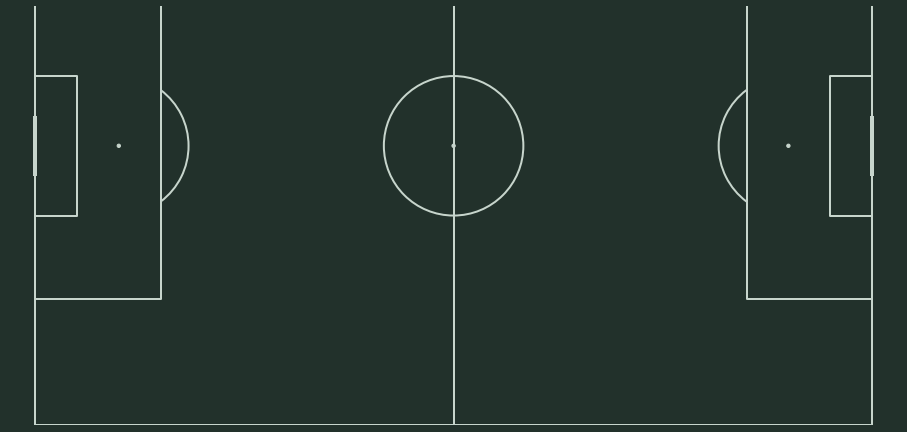

In [98]:
fig, ax = plt.subplots(figsize=(16,9))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.ylim(0,60)


plotShotMap()





plt.savefig('testshotmap.png',dpi=300,bbox_inches = 'tight')